In [1]:
# load in required packages
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
# first for aggregate trip distance
city='Berlin'
fp='../outputs/ML_Results/shap/dist_agg/' + city + '.pkl'
with open(fp, 'rb') as f:
    shap_values=pickle.load(f)

fp='../outputs/ML_Results/shap/dist_agg/' + city + '_importance.pkl'
with open(fp, 'rb') as f:
    importance=pickle.load(f)

importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
importance['Region']=city
importance_all=importance.copy()

for city in ['Paris','Madrid','Wien','Germany_other','France_other']:
    print(city)
    fp='../outputs/ML_Results/shap/dist_agg/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_values=pickle.load(f)

    fp='../outputs/ML_Results/shap/dist_agg/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance=pickle.load(f)

    importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
    importance['Region']=city
    importance_all=pd.concat([importance_all,importance])

Paris
Madrid
Wien
Germany_other
France_other


In [3]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all.loc[importance_all['Region']=='Wien','Region']='Vienna'
importance_all

,column_name,shap_importance,cont_pc,Region
1,DistCenter_res,697.088623,57.009324,Berlin
3,UrbBuildDensity_res,172.919281,14.14169,Berlin
4,IntersecDensity_res,142.002228,11.613231,Berlin
9,Age,80.435585,6.578186,Berlin
8,Commute_Trip,78.695137,6.435848,Berlin
2,UrbPopDensity_res,23.632566,1.932719,Berlin
5,street_length_res,12.533825,1.025042,Berlin
7,LU_Comm_res,7.040367,0.575775,Berlin
6,LU_UrbFab_res,4.767141,0.389867,Berlin
0,DistSubcenter_res,3.647727,0.298319,Berlin


In [4]:
# for distance agg new
col_dict= {'DistCenter_res':'Dist. to city center','IntersecDensity_res':'Instersection density','street_length_res':'Avg. street length','Commute_Trip':'Commuting trip share',
       'UrbBuildDensity_res':'Built-up density','UrbPopDensity_res':'Population density', 'DistSubcenter_res':'Dist. to subcenter','Age':'Age',
       'LU_UrbFab_res':'Urban fab. land-use share', 'LU_Comm_res':'Commercial land-use share',
       'HHSize':'Household size','maxAgeHH':'Max householder age','InEmployment':'Employed'}

importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)

In [5]:
importance_plot

,column_name,shap_importance,cont_pc,Region
1,Dist. to city center,697.088623,57.009324,Berlin
3,Built-up density,172.919281,14.14169,Berlin
4,Instersection density,142.002228,11.613231,Berlin
9,Age,80.435585,6.578186,Berlin
8,Commuting trip share,78.695137,6.435848,Berlin
2,Population density,23.632566,1.932719,Berlin
5,Avg. street length,12.533825,1.025042,Berlin
7,Commercial land-use share,7.040367,0.575775,Berlin
6,Urban fab. land-use share,4.767141,0.389867,Berlin
0,Dist. to subcenter,3.647727,0.298319,Berlin


In [6]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Madrid,Paris,Vienna
column_name,,,,,,
Dist. to city center,57.009324,28.41342,43.087695,41.818178,45.862092,29.365017
Commuting trip share,6.435848,17.933341,13.886939,10.029095,27.926136,14.671608
Instersection density,11.613231,24.846806,2.041398,9.860832,1.224234,7.49322
Built-up density,14.14169,4.777791,8.573838,3.001224,3.273604,15.525437
Population density,1.932719,10.388409,2.852192,11.951581,1.123585,18.178308
Dist. to subcenter,0.298319,7.02363,6.321465,12.838717,14.977539,4.195401
Urban fab. land-use share,0.389867,1.273506,10.405964,3.076995,1.046791,4.517906
Age,6.578186,2.184525,5.461845,1.655955,1.16411,0.716845
Commercial land-use share,0.575775,0.828516,5.988131,1.276744,2.22897,3.515291


Text(0.5, 1.0, 'Feature importance for trip distance, by city')

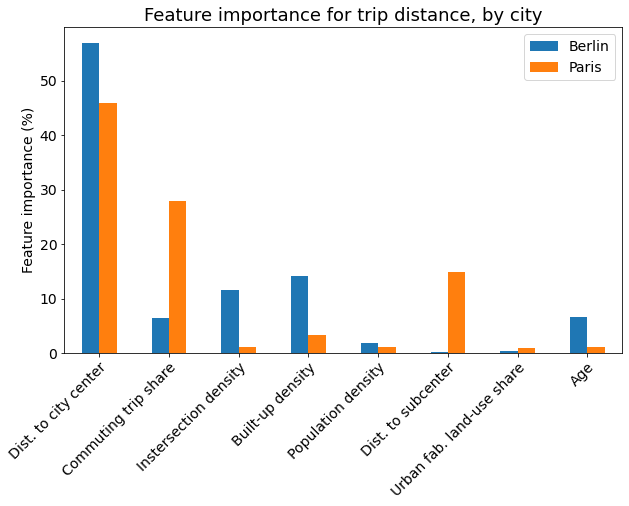

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
#ip.iloc[0:7,:].plot(kind='bar',ax=ax)
ip.loc[:,['Berlin','Paris']].iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('Feature importance for trip distance, by city',fontsize=18)

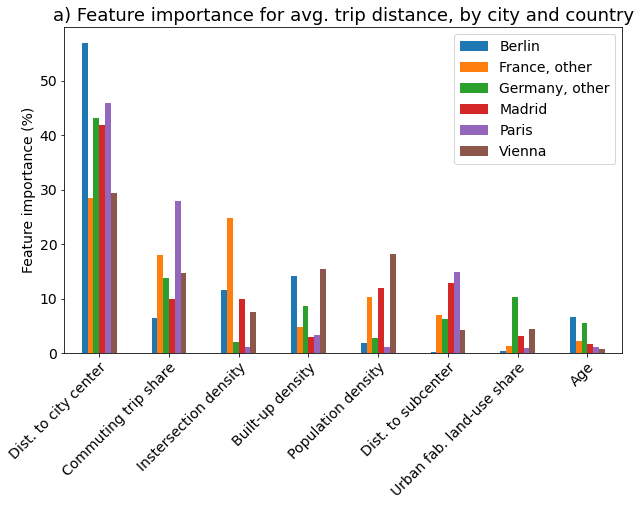

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('a) Feature importance for avg. trip distance, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/dist_agg/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')

In [20]:
# mode choice
cities_all=['Berlin','Dresden','Düsseldorf','Frankfurt am Main','Kassel','Leipzig','Magdeburg','Potsdam','Clermont','Dijon','Lille','Lyon','Montpellier','Nantes','Nimes','Paris','Toulouse','Madrid','Wien','France','Germany','Madrid_Wien','France_other','Germany_other']
countries=['Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','France','France','France','France','France','France','France','France','France','Spain','Austria','France','Germany','Spain_Austria','France','Germany']


In [21]:
#city='Berlin'
def mode_group_home(city):
    fp='../outputs/ML_Results/shap/mode_common_new/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/mode_common_new/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all


In [22]:
cities=pd.Series(['Berlin','Paris','Madrid','Wien','France_other','Germany_other'])
importance2=cities.apply(mode_group_home)
importance2

0                            column_name shap_impor...
1                            column_name shap_impor...
2                            column_name shap_impor...
3                            column_name shap_impor...
4                            column_name shap_impor...
5                            column_name shap_impor...
dtype: object

In [23]:
importance_all = pd.concat([importance2[0], importance2[1],importance2[2],importance2[3],importance2[4],importance2[5]])
#importance_all['column_name']=importance_all['column_name'].replace({'CarOwnershipHH':'CarAvailable'})
importance_all.groupby('column_name')['cont_pc'].sum().sort_values(ascending=False)[0:20]

column_name
Trip_Distance                      226.315366
Age                                 36.997317
CarOwnershipHH                      34.075915
Sex                                 20.578152
DistCenter_origin                   19.346174
UrbPopDensity_origin                 16.90767
Trip_Purpose_Agg_Home↔Leisure       15.960851
transit_accessibility_origin        14.793092
bike_lane_share_origin              14.311979
DistSubcenter_origin                13.261645
HHSize                              12.585786
street_length_origin                12.349903
UrbBuildDensity_origin              12.230272
Trip_Purpose_Agg_Home↔Work          12.098958
IntersecDensity_origin              11.504165
LU_Comm_origin                      10.633526
LU_UrbFab_origin                     10.62447
Trip_Purpose_Agg_Home↔Companion     10.556926
Education_University                  9.89674
Trip_Purpose_Agg_Home↔Shopping       7.290866
Name: cont_pc, dtype: object

In [12]:
importance_all = pd.concat([importance2[0], importance2[1],importance2[2],importance2[3],importance2[4],importance2[5]])
#importance_all['column_name']=importance_all['column_name'].replace({'CarOwnershipHH':'CarAvailable'})
importance_all.groupby('column_name')['cont_pc'].sum().sort_values(ascending=False)[0:20]

column_name
Trip_Distance                      228.447119
Age                                 37.644978
CarOwnershipHH                      34.292695
DistCenter_origin                   21.535281
Sex                                 20.546012
UrbPopDensity_origin                19.643562
Trip_Purpose_Agg_Home↔Leisure       15.923789
bike_lane_share_origin              15.179014
DistSubcenter_origin                13.801289
UrbBuildDensity_origin              13.698999
HHSize                              12.716223
street_length_origin                   12.711
IntersecDensity_origin              12.527375
Trip_Purpose_Agg_Home↔Work          12.215286
LU_Comm_origin                       11.35964
LU_UrbFab_origin                    11.266268
Trip_Purpose_Agg_Home↔Companion     10.833113
Education_University                10.069772
Trip_Purpose_Agg_Home↔Shopping       7.334033
Trip_Purpose_Agg_Home↔School         6.276424
Name: cont_pc, dtype: object

In [14]:
col_dict= {'Trip_Distance':'Trip distance','CarOwnershipHH':'Car Ownership','Age':'Age','DistCenter_origin':'Dist. to city center','transit_accessibility_origin':'Transit accessibility',
           'Sex':'Sex','UrbPopDensity_origin':'Population density','Trip_Purpose_Agg_Home↔Leisure':'Leisure Trip','bike_lane_share_origin':'Cycle lane share'}


In [8]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all.loc[importance_all['Region']=='Wien','Region']='Vienna'


In [15]:
importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)
importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False)

column_name
Trip distance            37.719228
Age                       6.166219
Car Ownership             5.679319
Sex                       3.429692
Dist. to city center      3.224362
Population density        2.817945
Leisure Trip              2.660142
Transit accessibility     2.465515
Cycle lane share          2.385330
Name: cont_pc, dtype: float64

In [16]:
importance_plot.dropna(inplace=True)
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
i

Index(['Trip distance', 'Age', 'Car Ownership', 'Sex', 'Dist. to city center',
       'Population density', 'Leisure Trip', 'Transit accessibility',
       'Cycle lane share'],
      dtype='object', name='column_name')

In [17]:
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)

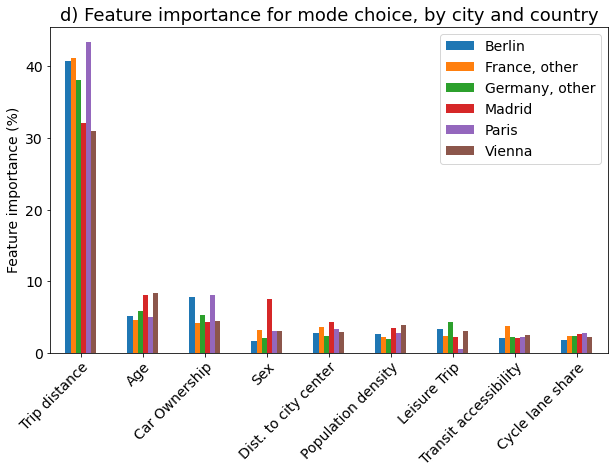

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ip.plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('d) Feature importance for mode choice, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/mode_common_new/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')

In [2]:
# and car ownership
def carown(city):
    fp='../outputs/ML_Results/shap/carown_new/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/carown_new/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all

In [3]:
cities=pd.Series(['Berlin','Paris','France_other','Germany_other'])
importance2=cities.apply(carown)

In [4]:
importance_all = pd.concat([importance2[0], importance2[1],importance2[2],importance2[3]])
importance_all.groupby('column_name')['cont_pc'].sum().sort_values(ascending=False)[0:10]

column_name
IncomeDetailed_Numeric       112.047114
DistCenter                      51.0278
maxAgeHH                      41.067754
HHSize                        37.981439
transit_accessibility         16.438857
UrbPopDensity                 15.936758
bike_lane_share               14.969836
UniversityEducation           14.273697
InEmployment                  13.451918
HHType_simp_Single_Female     11.910881
Name: cont_pc, dtype: object

In [5]:
col_dict= {'DistCenter':'Dist. to city center','IntersecDensity':'Instersection density','bike_lane_share':'Cycle lane share',
       'UrbBuildDensity':'Built-up density','UrbPopDensity':'Population density','StreetsPerNode':'Streets per node','UniversityEducation':'University Educated',
       'IncomeDetailed_Numeric':'Income','HHSize':'Household size','maxAgeHH':'Max householder age','DistCenter':'Dist. to city center','transit_accessibility':'Transit Accessibility',
       'InEmployment':'Employed'}



In [6]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all.loc[importance_all['Region']=='Wien','Region']='Vienna'

In [7]:
importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)
importance_plot.dropna(inplace=True)

In [8]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Paris
column_name,,,,
Income,20.91857,28.730038,29.7093,32.689207
Dist. to city center,18.564086,6.752364,9.528934,16.182416
Max householder age,13.897901,7.110191,10.467605,9.592057
Household size,13.336075,2.808548,11.723599,10.113216
Transit Accessibility,4.503393,5.136324,2.65427,4.14487
Population density,3.832621,3.7545,2.783607,5.56603
Cycle lane share,1.372475,4.262968,4.691831,4.642562
University Educated,3.093724,7.214448,2.388802,1.576723
Employed,2.055671,5.597142,4.732496,1.06661


In [9]:
from matplotlib.colors import ListedColormap
cmap=ListedColormap(['tab:blue','tab:orange','tab:green','tab:purple'])

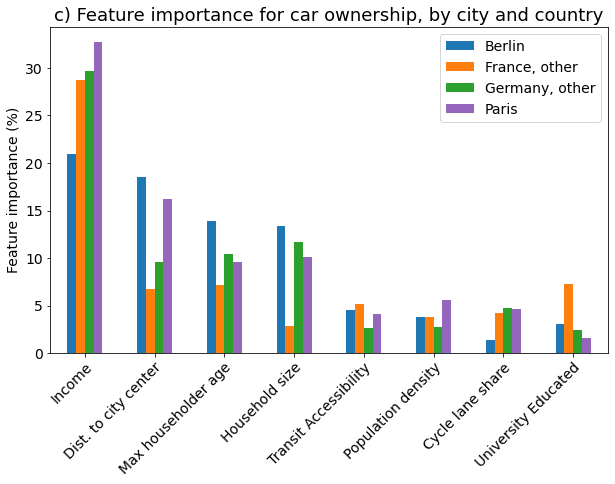

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax,cmap=cmap)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('c) Feature importance for car ownership, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/carown_new/FIcomp_cities_new.png',facecolor='w',dpi=150,bbox_inches='tight')

In [22]:
# and distance for commuting
def distcomm(city):
    fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_valueslist=pickle.load(f)


    fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance_df=pickle.load(f)

    importance_df['cont_pc']=100*importance_df['shap_importance']/importance_df['shap_importance'].sum()
    importance_df['Region']=city
    importance_all=importance_df.copy()

    return importance_all
cities=pd.Series(['Berlin','Paris','Madrid','Wien','France_other','Germany_other'])
importance2=cities.apply(distcomm)

In [23]:
importance2

0                         column_name shap_importan...
1                         column_name shap_importan...
2                         column_name shap_importan...
3                         column_name shap_importan...
4                         column_name shap_importan...
5                         column_name shap_importan...
dtype: object

In [24]:
# first for aggregate trip distance
city='Berlin'
fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
with open(fp, 'rb') as f:
    shap_values=pickle.load(f)

fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
with open(fp, 'rb') as f:
    importance=pickle.load(f)

importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
importance['Region']=city
importance_all=importance.copy()

for city in ['Paris','Madrid','Wien','Germany_other','France_other']:
    print(city)
    fp='../outputs/ML_Results/shap/dist_commute/' + city + '.pkl'
    with open(fp, 'rb') as f:
        shap_values=pickle.load(f)

    fp='../outputs/ML_Results/shap/dist_commute/' + city + '_importance.pkl'
    with open(fp, 'rb') as f:
        importance=pickle.load(f)

    importance['cont_pc']=100*importance['shap_importance']/importance['shap_importance'].sum()
    importance['Region']=city
    importance_all=pd.concat([importance_all,importance])

Paris
Madrid
Wien
Germany_other
France_other


In [25]:
importance_all.loc[importance_all['Region']=='France_other','Region']='France, other'
importance_all.loc[importance_all['Region']=='Germany_other','Region']='Germany, other'
importance_all.loc[importance_all['Region']=='Wien','Region']='Vienna'

In [26]:
# for distance agg new
col_dict= {'DistCenter_res':'Dist. to city center','Sex':'Sex','Trip_Time_AM_Rush':'Time: Morning Rush Hour','UrbPopDensity_res':'Population density',
           'Age':'Age','UrbBuildDensity_res':'Built-up density','IntersecDensity_res':'Instersection density','Trip_Time_Nighttime Off-Peak':'Time: Night'}

importance_plot=importance_all.copy()
importance_plot['column_name']=importance_plot['column_name'].map(col_dict)

In [27]:
importance_plot.dropna(inplace=True)
importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).head(15)

column_name
Dist. to city center       31.442932
Sex                         9.945845
Time: Morning Rush Hour     7.269485
Population density          4.958169
Age                         4.726583
Built-up density            4.514852
Instersection density       4.366899
Time: Night                 4.058640
Name: cont_pc, dtype: float64

In [28]:
i=importance_plot.groupby('column_name')['cont_pc'].mean().sort_values(ascending=False).index
ip=importance_plot.pivot("column_name", "Region", "cont_pc").reset_index()
ip.index=ip.column_name
ip.drop(columns='column_name',inplace=True)
ip=ip.reindex(i)
ip

Region,Berlin,"France, other","Germany, other",Madrid,Paris,Vienna
column_name,,,,,,
Dist. to city center,44.571071,30.881497,17.985662,35.073793,33.082697,27.06287
Sex,10.263544,9.298328,9.008446,8.281867,10.833527,11.989361
Time: Morning Rush Hour,8.267991,3.721458,26.584487,4.039086,0.292902,0.710986
Population density,2.259449,2.093072,2.418791,5.357615,1.728473,15.891616
Age,3.751578,5.512166,4.548712,4.939218,3.697669,5.910153
Built-up density,4.89263,1.603056,6.353936,5.02961,6.728844,2.481035
Instersection density,3.471096,7.442921,2.06848,4.453825,3.222015,5.543056
Time: Night,5.733816,0.009466,8.502613,0.443771,5.226657,4.435516


Text(0.5, 1.0, 'Feature importance for trip distance, by city')

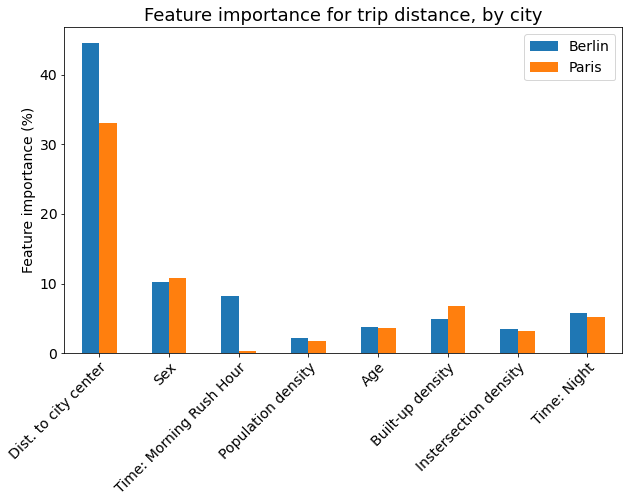

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
#ip.iloc[0:7,:].plot(kind='bar',ax=ax)
ip.loc[:,['Berlin','Paris']].iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('Feature importance for trip distance, by city',fontsize=18)

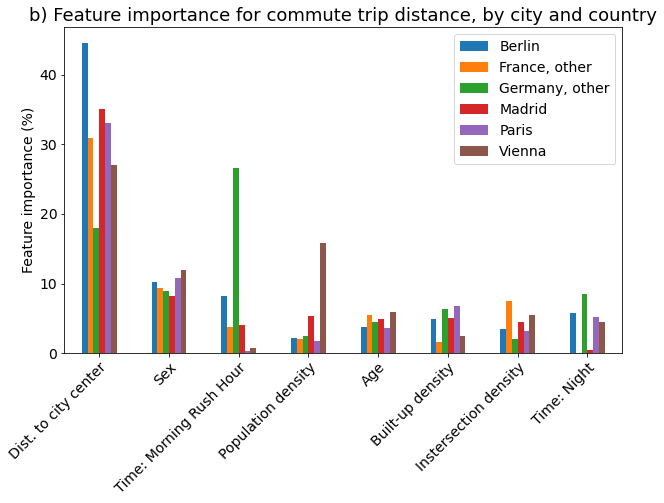

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ip.iloc[0:8,:].plot(kind='bar',ax=ax)
plt.xticks(rotation = 45,fontsize=14,ha='right',rotation_mode='anchor')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('')
plt.ylabel('Feature importance (%)',fontsize=14)
plt.title('b) Feature importance for commute trip distance, by city and country',fontsize=18)
plt.savefig('../outputs/ML_Results/result_figures/dist_commute/FIcomp_cities.png',facecolor='w',dpi=65,bbox_inches='tight')